<h2 style="font-size:36px;">A RISK-BASED AIRCRAFT SELECTION ANALYSIS</h2>


<img src="plane.jpg" width="1000" height="700">

<h3 style="font-size:36px;">Overview</h3>


<body>
    The company is venturing into the aviation industry and do commercial and private aviation.The company discovers that it has no clue of what low risk aircraft they want to choose,through this analysis and checking of past records a conclusion was made.The analysis done here is the EDA and descriptive analysis which helped to understand the data and the columns that correlated.Also factors like financial feasibility ,safety of the aircrafts and also weather conditions were factors that were considered when analyzing the data.

</body>



<h3 style="font-size:36px;">Business Understanding</h3>


<h7 style="font-size:36px;"><b>Problem Statement</b></h7>

The company is a newbie in the aviation sector and its main concern  is to select the best aircraft that is low risk in relation to the company’s demand


<h7 style="font-size:36px;"><b>Main Objective</b></h7>

Its objective is to look for an aircraft that is low risk in terms of operational costs that includes maintenance,fuel,repair ,and customer satisfaction.An aircraft that is safe to use and has a past record of regulation compliance and lastly that satisfies the clients and also the business which is returning on investment.


<h7 style="font-size:36px;"><b>Specific Objective</b></h7>
<ul>
<li>To identify an aircraft that as low accident frequencyand minimal repair cost so as to allow optimal financial feasibility</li>
<li>To determine the safety of clients by checking the safest aircraft models that may cause little to no severe injuries incase of accidents</li>
<li>To analyze the impact of weather conditions on aircraft accident severity,focusing on fatal injuries and to identify aircraft models that demonstrate lower risk in adverse weather conditons</li>
</ul>

<h4 style="font-size:36px;"><b>Data Understanding</b></h4>
This data comes from the National Transportation Safety Board that includes aviation accident data about cival and selected aviation data in the US and its found in kaggle 

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
df=pd.read_csv("AviationData.csv" ,encoding="windows-1252")
df
# we have encoded our data incase of any special data characters which is not readable hence encoding we didnt use utf-8 since it gave me an error

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


We will also check the rows,columns,duplicates missing values descriptive information about the data

In [31]:
# summary information about the data
#we can also see the data types and the columns that this data set has like event id investigation type,accident number and so on
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [32]:
#how many rows and columns are there using the df.shape
df.shape #there are 88889 rows and 31 columns

(88889, 31)

In [33]:
# we will check the statistical analysis of the data 
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


<h4 style="font-size:36px;"><b>Data Preparation</b></h4>
Here we will check for duplicates ,anormalies and missing values that may affect our data analysis

In [34]:
df.columns=df.columns.str.strip()

In [35]:
#check if there are duplicates
df.duplicated().value_counts()

False    88889
dtype: int64

In [36]:
df=df.drop_duplicates()

In [37]:
#checkout missing values
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

<h4><b>How i handled data cleaning and preparation</b></h4>
<ol>
<li>for the columns whose data is not relevant to my analysis and whose columns 80% of the data is missing i dropped the columns:Aircraft.category,FAR.Description ,schedule and Air carrier</li>
    <li> for those columns whose data is less than 10,000 entries i dropped the missing values</li>
    <li> for those columns whose data is more than 10,000 but less than the 40,000 entries i replaced them </li>
    </ol>

In [38]:
#handling  missing values for the the less than 10,500 entries
df.dropna(subset=['Location','Country','Injury.Severity','Aircraft.damage','Registration.Number','Make','Model','Amateur.Built','Number.of.Engines','Engine.Type','Purpose.of.flight','Report.Status','Weather.Condition','Total.Fatal.Injuries','Total.Minor.Injuries','Total.Uninjured','Total.Serious.Injuries'],inplace=True)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88639,20221011106092,Accident,CEN23LA008,2022-10-06,"Iola, TX",United States,304354N,0096752W,PVT,Private,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,The pilot’s failure to maintain control of the...,20-12-2022
88647,20221011106098,Accident,ERA23LA014,2022-10-08,"Dacula, GA",United States,034055N,0835224W,LZU,GWINNETT COUNTY - BRISCOE FLD,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,NaN,An in-flight collision with a bird while on ap...,20-12-2022
88661,20221018106153,Accident,CEN23LA015,2022-10-13,"Ardmore, OK",United States,034849N,0097722W,1F0,Ardmore Downtown Executive Air,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,The pilot did not ensure adequate clearance fr...,20-12-2022
88735,20221031106231,Accident,CEN23LA023,2022-10-29,"Houston, TX",United States,293620N,0095959W,EFD,ELLINGTON,...,ASHO,NaN,0.0,1.0,0.0,0.0,VMC,NaN,The pilot’s failure to secure the magneto swit...,20-12-2022


In [39]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Latitude                  46703
Longitude                 46703
Airport.Code              26068
Airport.Name              23673
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         43293
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
FAR.Description           43292
Schedule                  55961
Purpose.of.flight             0
Air.carrier               52205
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight     16573
Report.Status                 0
Publication.Date          11927
dtype: i

In [40]:
#handling  for columns with 56,000-70,000 missing values and irrelevant  column like longitude,latitude,publication date,airport.code and name which i will not be using or relevant for my analysis
df.drop(columns=['Aircraft.Category','FAR.Description','Schedule','Air.carrier','Latitude','Longitude','Airport.Code','Airport.Name','Publication.Date'],inplace=True)

In [41]:
#confirm if they are all gone
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight     16573
Report.Status                 0
dtype: int64

In [42]:
# i will handle the missing value for broad phase of flight which explains at what point did the incident happen if its take off or landing
df['Broad.phase.of.flight']

0         Cruise
1        Unknown
3         Cruise
6        Unknown
7        Takeoff
          ...   
88639        NaN
88647        NaN
88661        NaN
88735        NaN
88767        NaN
Name: Broad.phase.of.flight, Length: 63071, dtype: object

In [43]:
df['Broad.phase.of.flight'].value_counts
#here i checked the value which is the most common here and its looks like unknown is the most common so i will fill the missing values with it

<bound method IndexOpsMixin.value_counts of 0         Cruise
1        Unknown
3         Cruise
6        Unknown
7        Takeoff
          ...   
88639        NaN
88647        NaN
88661        NaN
88735        NaN
88767        NaN
Name: Broad.phase.of.flight, Length: 63071, dtype: object>

In [44]:
df['Broad.phase.of.flight'].fillna('Unknown',inplace=True)#filling the missing values with the unknown as it is the most common value
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,N4988E,Cessna,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,N2482N,Cessna,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88639,20221011106092,Accident,CEN23LA008,2022-10-06,"Iola, TX",United States,Non-Fatal,Substantial,N18158,CESSNA,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Unknown,The pilot’s failure to maintain control of the...
88647,20221011106098,Accident,ERA23LA014,2022-10-08,"Dacula, GA",United States,Non-Fatal,Substantial,N2047Q,CESSNA,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Unknown,An in-flight collision with a bird while on ap...
88661,20221018106153,Accident,CEN23LA015,2022-10-13,"Ardmore, OK",United States,Non-Fatal,Substantial,N2889W,BEECH,...,2.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Unknown,The pilot did not ensure adequate clearance fr...
88735,20221031106231,Accident,CEN23LA023,2022-10-29,"Houston, TX",United States,Minor,Substantial,N778MS,STEPHEN J HOFFMAN,...,1.0,Reciprocating,ASHO,0.0,1.0,0.0,0.0,VMC,Unknown,The pilot’s failure to secure the magneto swit...


In [45]:
#check if all missing values are handled
df.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
dtype: int64

In [46]:
#converting event date time from object to datetime
pd.to_datetime(df['Event.Date'],format='%Y/%m/%d').head()

0   1948-10-24
1   1962-07-19
3   1977-06-19
6   1981-08-01
7   1982-01-01
Name: Event.Date, dtype: datetime64[ns]

In [60]:
#checking for outliers and abnormalities for numerical columns
columns=['Total.Uninjured' ,'Total.Minor.Injuries','Total.Fatal.Injuries','Number.of.Engines','Total.Serious.Injuries']


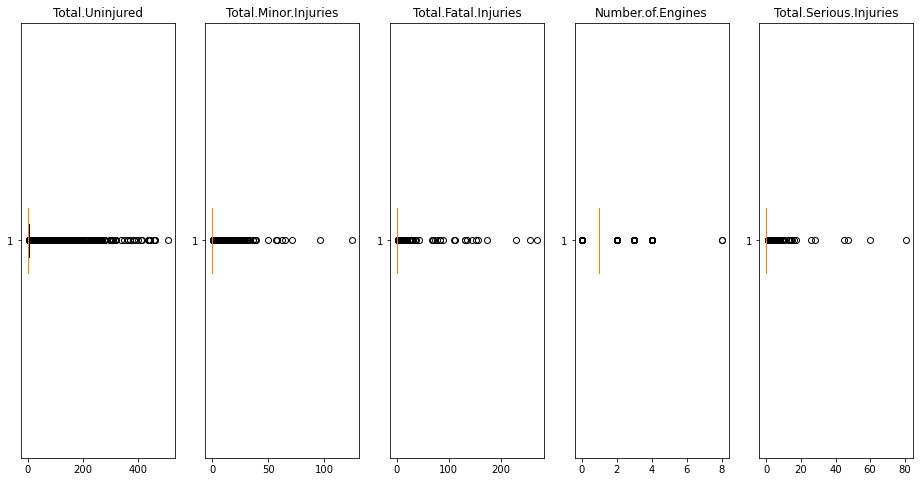

In [70]:
fig, axes = plt.subplots(1, 5, figsize=(16, 8))
axes = axes.flatten()
for i, col in enumerate(columns):
    axes[i].boxplot(df[col], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    axes[i].set_title(col)
plt.show()

As you can see they are moving toward the right side these means they are positively skewed

In [71]:
df.describe()#as you can see the mean and median of this numerical columns are positevely skewed meaning the mean is higher than median we will use the upper and lower bound to remove outliers

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,63071.000000,63071.000000,63071.000000,63071.000000,63071.000000
mean,1.118628,0.383393,0.209668,0.282824,2.290165
std,0.387951,2.745936,0.779121,1.279734,14.662714
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,270.000000,81.000000,125.000000,507.000000


i used zscore to remove outliers because it wasnt as aggressive as the lower and upper bound which reduced my mean and mode of the columns with outliers to 0 so when visualizing my plots came back empty
z score means comparing my mean to 3 standard deviation if the mean is above the std then its a positive z score and vice versa is a negative zscore

In [49]:
from scipy.stats import zscore
Numerical_cols=['Number.of.Engines','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries']
df[Numerical_cols]=df[Numerical_cols].apply(zscore)
df_numerical=df[Numerical_cols]
df_numerical

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
0,-0.305784,0.588732,-0.269111,-0.221004
1,-0.305784,1.317087,-0.269111,-0.221004
3,-0.305784,0.588732,-0.269111,-0.221004
6,-0.305784,1.317087,-0.269111,-0.221004
7,-0.305784,-0.139623,-0.269111,-0.221004
...,...,...,...,...
88639,-0.305784,-0.139623,-0.269111,-0.221004
88647,-0.305784,-0.139623,-0.269111,-0.221004
88661,2.271880,-0.139623,-0.269111,-0.221004
88735,-0.305784,-0.139623,1.014397,-0.221004


In [50]:
df_numerical.describe()#this helps to show if the outliers have been removed

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
count,6.307100e+04,6.307100e+04,6.307100e+04,6.307100e+04
mean,-1.189664e-16,-4.506304e-18,1.982774e-17,-4.326052e-17
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-2.883448e+00,-1.396232e-01,-2.691112e-01,-2.210040e-01
25%,-3.057837e-01,-1.396232e-01,-2.691112e-01,-2.210040e-01
50%,-3.057837e-01,-1.396232e-01,-2.691112e-01,-2.210040e-01
75%,-3.057837e-01,-1.396232e-01,-2.691112e-01,-2.210040e-01
max,1.773786e+01,9.818829e+01,1.036950e+02,9.745630e+01


In [51]:
df_numerical=df

We will perform some EDA ANALYSIS TO SEE HOW DIFFERENT COLUMNS RELATE WITH ONE ANOTHER

Here we will check patterns between different columns and also correlations between them

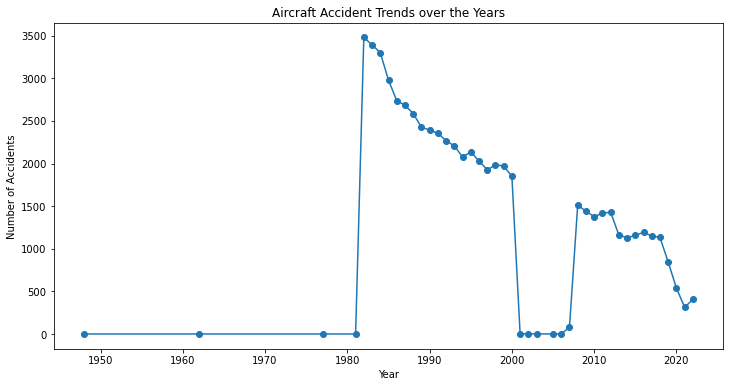

In [52]:
#the first column to check is  to  check different trend of accidents over time using line plot
df['Year']=pd.to_datetime(df['Event.Date']).dt.year
accident_trends=df.groupby('Year').size()

plt.figure(figsize=(12,6))
accident_trends.plot(marker='o')
plt.title('Aircraft Accident Trends over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

according to this visualiztaion we can see between 1950-1980 the accidents were low then in 1990 the accidents escallated and remained constant upto 2000-2010 then escalated again in 2010 and remained constant and flactuated abit toward 2020

we want to see correlation between features and see factors like aircraft type,weather influences fatalities

In [ ]:
df.plot.scatter(x='Make', y='Total.Fatal.Injuries',alpha=0.5,title='Total.Fatal.Injuries vs.Make')

<AxesSubplot:title={'center':'Total.Fatal.Injuries vs.Make'}, xlabel='Make', ylabel='Total.Fatal.Injuries'>

We will check for correlation between Total fatal injuries and make how many accidents had fatal injuries

<h4 style="font-size:36px;"><b>Data Analysis part two</b></h4>


We will do our analysis based on our objectives and we will see how various columns relate and do some visualizations
We will start our analysis with our first objective which is down below
<ul>
    <li>To identify an aircraft that as low accident frequencyand minimal repair cost so as to allow optimal financial feasibility</li>
    </ul>
    in order to achieve this objective we have to:
    <ol>
    <li>identify aircraft models with low accident frequency</li>
    <li>Estimate repairement cost based on aircraft damage severity,the more damages it has the higher the cost</li>
    

In [26]:
#for the first sub objective we will get the low accident frequency using the model,make and accident number columns

accident_frequency=df.groupby(['Make','Model'])['Accident.Number'].count().reset_index()
accident_frequency

,Make,Model,Accident.Number
0,177MF LLC,PITTS MODEL 12,1
1,1st Ftr Gp,FOCKE-WULF 190,1
2,2007 Savage Air LLC,EPIC LT,1
3,2021FX3 LLC,CCX-2000,1
4,67 Flying Dutchman,D1/LFD-13,1
...,...,...,...
13974,Zwart,KIT FOX VIXEN,1
13975,de Havilland,Beaver DHC-2 MK.1,1
13976,de Havilland,DHC-2,3
13977,de Havilland,DHC-6-200,1


Our goal is to see which models and make have the least number of accidents we can sort the values in an ascending order

In [27]:
least_accident_frequency=accident_frequency.sort_values(['Accident.Number'],ascending=True)
least_accident_frequency# here it tells us the lowest frequency accidents based on accident number

,Make,Model,Accident.Number
0,177MF LLC,PITTS MODEL 12,1
8629,MUSICK,LANCAIR 235,1
8631,MX AIRCRAFT LLC,MXS,1
8632,MXR TECHNOLOGIES,MX2,1
8633,MYERS,THORP-18,1
...,...,...,...
3681,Cessna,150,634
10435,Piper,PA-28-140,666
3759,Cessna,172N,778
3723,Cessna,172,1061


We will check for the second subobjective which is to Estimate repairement cost based on aircraft damage severity,the more damages it has the higher the cost

In [27]:
#create  columnns  and create also a dictionary that will map the intesity of damage found in the aircraft damage column
damage_severity={'Destroyed':3,'Substantial':2,'Minor':1,'Unknown':0}
df['Repair_Cost']=df['Aircraft.damage'].map(damage_severity)
#in this code we treated it in terms of the more it is destroyed the higher the cost

In [28]:
#Group models based on their average repair cost
repair_df=df.groupby(['Make','Model'])['Repair_Cost'].mean().reset_index()
repair_df#here if we see repair cost is 1.0 it means its minor cost

,Make,Model,Repair_Cost
0,177MF LLC,PITTS MODEL 12,2.0
1,1st Ftr Gp,FOCKE-WULF 190,3.0
2,2007 Savage Air LLC,EPIC LT,1.0
3,2021FX3 LLC,CCX-2000,2.0
4,67 Flying Dutchman,D1/LFD-13,2.0
...,...,...,...
13974,Zwart,KIT FOX VIXEN,2.0
13975,de Havilland,Beaver DHC-2 MK.1,2.0
13976,de Havilland,DHC-2,2.0
13977,de Havilland,DHC-6-200,2.0


In [29]:
#merge the accident frequency and repair cost
fit_aircraft=pd.merge(least_accident_frequency,repair_df,on=['Make','Model'])
fit_aircraft

,Make,Model,Accident.Number,Repair_Cost
0,177MF LLC,PITTS MODEL 12,1,2.000000
1,MUSICK,LANCAIR 235,1,2.000000
2,MX AIRCRAFT LLC,MXS,1,2.000000
3,MXR TECHNOLOGIES,MX2,1,2.000000
4,MYERS,THORP-18,1,2.000000
...,...,...,...,...
13974,Cessna,150,634,2.156151
13975,Piper,PA-28-140,666,2.282282
13976,Cessna,172N,778,2.235219
13977,Cessna,172,1061,2.119698


In [30]:
#sort the values based on lowest accident frequency and repair cost so that we see the make and models that are low risk
fit_aircraft=fit_aircraft.sort_values(['Accident.Number','Repair_Cost'],ascending=[True,True])
fit_aircraft

,Make,Model,Accident.Number,Repair_Cost
5812,SWANN LYNN J,SEAWIND 3000,1,0.000000
26,MORRISON ROCKY V,Sportsman GS-2,1,1.000000
41,MUELLER MICHAEL WALTER,CHALLENGER II CW SPC,1,1.000000
196,Mcdonnell Douglas,DC-8-54,1,1.000000
199,Mcdonnell Douglas,DC-8-71,1,1.000000
...,...,...,...,...
13974,Cessna,150,634,2.156151
13975,Piper,PA-28-140,666,2.282282
13976,Cessna,172N,778,2.235219
13977,Cessna,172,1061,2.119698


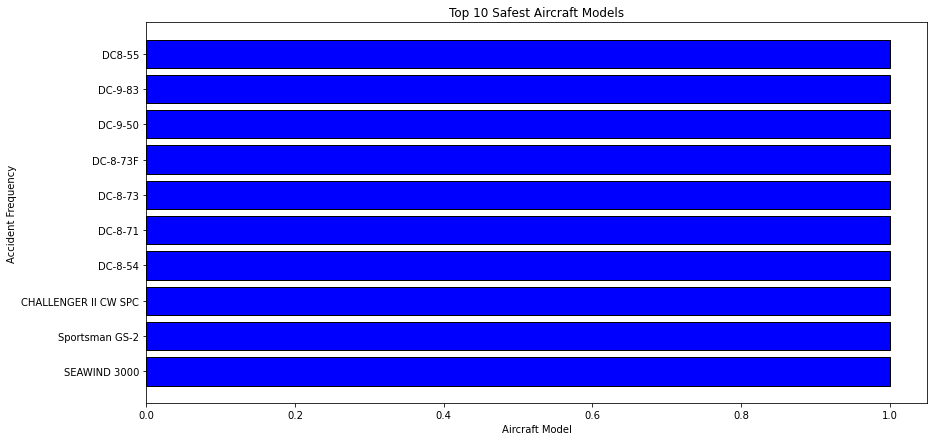

In [31]:
#a barchat that shows the first 10 aircrat models based on leastaccident frequency and repair cost(low)
top_10_aircraft=fit_aircraft.head(10)
#plotting the bar

plt.figure(figsize=(14,7))
plt.barh(top_10_aircraft['Model'],top_10_aircraft['Accident.Number'],color='blue',edgecolor='black')
plt.xlabel('Aircraft Model')
plt.ylabel('Accident Frequency')
plt.title('Top 10 Safest Aircraft Models')
plt.show()

The above visualization shows the top 10 models that have low accident frequency and also the repair cost is equally low based on aircraft damage

<b>THE SECOND OBJECTIVE</b>:To determine the safest aircraft models for clients to use and incase of accidents it doesnt cause fatal injuries

For this we have to first count the accidents per aircraft model and we did it previously

In [32]:
accident_frequency=df.groupby(['Make','Model'])['Accident.Number'].count().reset_index()
accident_frequency

,Make,Model,Accident.Number
0,177MF LLC,PITTS MODEL 12,1
1,1st Ftr Gp,FOCKE-WULF 190,1
2,2007 Savage Air LLC,EPIC LT,1
3,2021FX3 LLC,CCX-2000,1
4,67 Flying Dutchman,D1/LFD-13,1
...,...,...,...
13974,Zwart,KIT FOX VIXEN,1
13975,de Havilland,Beaver DHC-2 MK.1,1
13976,de Havilland,DHC-2,3
13977,de Havilland,DHC-6-200,1


In [33]:
#then sort the values so as to get the lowest accident frequency models
least_accident_frequency=accident_frequency.sort_values(['Accident.Number'],ascending=True)
least_accident_frequency

,Make,Model,Accident.Number
0,177MF LLC,PITTS MODEL 12,1
8629,MUSICK,LANCAIR 235,1
8631,MX AIRCRAFT LLC,MXS,1
8632,MXR TECHNOLOGIES,MX2,1
8633,MYERS,THORP-18,1
...,...,...,...
3681,Cessna,150,634
10435,Piper,PA-28-140,666
3759,Cessna,172N,778
3723,Cessna,172,1061


second step:calculate the injury intensity per model

In [35]:
injury_intensity=df.groupby(['Make','Model']).agg({
    'Total.Serious.Injuries':'sum',
    'Total.Fatal.Injuries': 'sum',
}).reset_index()#here we summed up serious and fatal injuries per aircraft model

third step: merge the accident frequency and injury severity on the make and model so as to get accident count,total serious injuries and total fatal injuries

In [36]:
safe_craft=accident_frequency.merge(injury_intensity,on=['Make','Model'],how='inner')
safe_craft

,Make,Model,Accident.Number,Total.Serious.Injuries,Total.Fatal.Injuries
0,177MF LLC,PITTS MODEL 12,1,2.297905,-0.139623
1,1st Ftr Gp,FOCKE-WULF 190,1,-0.269111,0.224554
2,2007 Savage Air LLC,EPIC LT,1,-0.269111,-0.139623
3,2021FX3 LLC,CCX-2000,1,-0.269111,-0.139623
4,67 Flying Dutchman,D1/LFD-13,1,-0.269111,-0.139623
...,...,...,...,...,...
13974,Zwart,KIT FOX VIXEN,1,-0.269111,-0.139623
13975,de Havilland,Beaver DHC-2 MK.1,1,-0.269111,-0.139623
13976,de Havilland,DHC-2,3,-0.807333,-0.418870
13977,de Havilland,DHC-6-200,1,-0.269111,-0.139623


Then we identify the safest aircraft models by sorting the lowest total accident and lowest serious and fatal injuries

In [37]:
safest_craft_models=safe_craft.sort_values(['Total.Fatal.Injuries','Total.Serious.Injuries',],ascending=[True,True])
safest_craft_models

,Make,Model,Accident.Number,Total.Serious.Injuries,Total.Fatal.Injuries
3704,Cessna,152,1913,-329.984492,-155.660879
3723,Cessna,172,1061,-81.449166,-94.606128
3681,Cessna,150,634,-58.951278,-65.213751
3703,Cessna,150M,475,-62.368892,-40.100243
6534,Grumman,G-164A,321,-54.296982,-38.992207
...,...,...,...,...,...
2602,Boeing,727-235,3,13.311255,55.664456
8888,Mcdonnell Douglas,DC-8-62,1,-0.269111,63.227251
2657,Boeing,747-131,3,-0.807333,83.341941
5209,Douglas,DC-8-63,4,-1.076445,93.763464


VISUALIZE THE SAFEST MODEL BASED ON INJURY INTENSITY

In [ ]:
df.groupby('Total.Fatal.Injuries')['Make'].sum().nsmallest().plot.bar(title="Total fatal Injuries Per Make",alpha=0.8)
plt.xticks(rotation=45)
plt.show()

<b>The Third Objective</b>To analyze the impact of weather conditions on aircraft accident severity,focusing on fatal injuries and to identify aircraft models that demonstrate lower risk in adverse weather conditons

1)to filter accidents caused by weather

In [62]:
weather_data=df[df['Weather.Condition'].notna()]
#i did this because i was getting key error so i found another way to prevent key error from reoccuring i realised that even though i dropped missing values i used notna so as to not show any missing values despite removing earlier


second step:group accidents by weather conditons so as to see how many accidents have been caused by weather

In [63]:
weather_accident_counts=weather_data.groupby('Weather.Condition')['Accident.Number'].count().reset_index()

we group weather condition and sum the total fatal and serious injuries so as to see how many accidents had fatal or serious injuries caused by weather condition

In [65]:
weather_analysis=weather_data.groupby('Weather.Condition').agg({
    'Total.Fatal.Injuries':'sum',
    'Total.Serious.Injuries':'sum',
    'Accident.Number':'count'
}).reset_index()

third step:Then identify the high risk weather patterns by calculating Fatility rate=(Total.Fatal.Injuries/Total Accidents)

In [66]:
weather_analysis['Fatality_Rate']=weather_analysis['Total.Fatal.Injuries'] / weather_analysis['Accident.Number']

Then sort the values by fatality rate by descending order to see the highest fatality rate

In [67]:
weather_analysis=weather_analysis.sort_values('Fatality_Rate',ascending=False)
weather_analysis

,Weather.Condition,Total.Fatal.Injuries,Total.Serious.Injuries,Accident.Number,Fatality_Rate
1,UNK,291.990935,-34.627386,577,0.506050
0,IMC,1840.511783,482.959818,4377,0.420496
2,Unk,12.654183,-9.542986,45,0.281204
3,VMC,-2145.156900,-438.789446,58072,-0.036940


we then identify aircraft models that had the fewest fatal injuries in high risk weather conditions

In [68]:
best_risk_models=weather_data.groupby(['Make','Model']).agg({
    'Total.Fatal.Injuries':'sum',
    'Total.Serious.Injuries':'sum',
    'Accident.Number':'count'
}).reset_index()
best_risk_models

,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Accident.Number
0,177MF LLC,PITTS MODEL 12,-0.139623,2.297905,1
1,1st Ftr Gp,FOCKE-WULF 190,0.224554,-0.269111,1
2,2007 Savage Air LLC,EPIC LT,-0.139623,-0.269111,1
3,2021FX3 LLC,CCX-2000,-0.139623,-0.269111,1
4,67 Flying Dutchman,D1/LFD-13,-0.139623,-0.269111,1
...,...,...,...,...,...
13974,Zwart,KIT FOX VIXEN,-0.139623,-0.269111,1
13975,de Havilland,Beaver DHC-2 MK.1,-0.139623,-0.269111,1
13976,de Havilland,DHC-2,-0.418870,-0.807333,3
13977,de Havilland,DHC-6-200,-0.139623,-0.269111,1


In [70]:
#sort models by the least number of fatalities in bad weather
best_risk_models=best_risk_models.sort_values(['Total.Fatal.Injuries','Total.Serious.Injuries'],ascending=[True,True])
best_risk_models

,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Accident.Number
3704,Cessna,152,-155.660879,-329.984492,1913
3723,Cessna,172,-94.606128,-81.449166,1061
3681,Cessna,150,-65.213751,-58.951278,634
3703,Cessna,150M,-40.100243,-62.368892,475
6534,Grumman,G-164A,-38.992207,-54.296982,321
...,...,...,...,...,...
2602,Boeing,727-235,55.664456,13.311255,3
8888,Mcdonnell Douglas,DC-8-62,63.227251,-0.269111,1
2657,Boeing,747-131,83.341941,-0.807333,3
5209,Douglas,DC-8-63,93.763464,-1.076445,4


visualization of the fatility rate by weather condition

In [71]:
weather_list=weather_analysis.head(10)

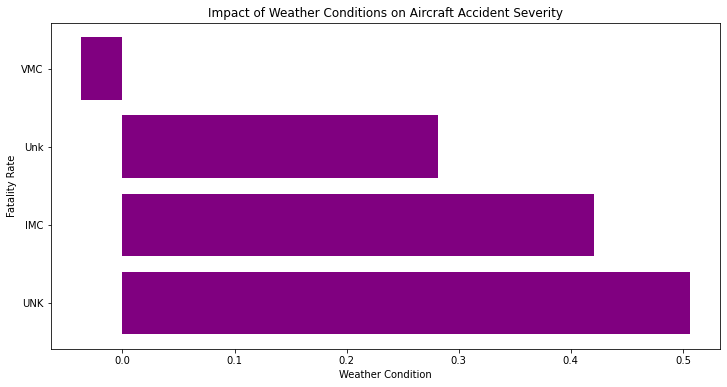

In [78]:
weather_list=weather_analysis.head(10)
plt.figure(figsize=(12,6))
plt.barh(weather_list['Weather.Condition'],weather_list['Fatality_Rate'],color='purple')
plt.xlabel('Weather Condition')
plt.ylabel('Fatality Rate')
plt.title('Impact of Weather Conditions on Aircraft Accident Severity')
plt.show()

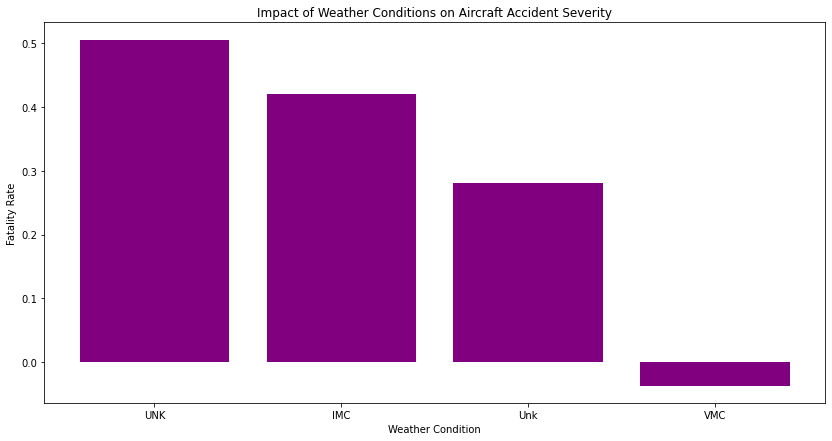

In [77]:
weather_list=weather_analysis.head(10)
plt.figure(figsize=(14,7))
plt.bar(weather_list['Weather.Condition'],weather_list['Fatality_Rate'],color='purple')
plt.xlabel('Weather Condition')
plt.ylabel('Fatality Rate')
plt.title('Impact of Weather Conditions on Aircraft Accident Severity')
plt.show()